# Task 5 Business Analytics Task

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


Importing the dataset

In [2]:
dataset = pd.read_csv("D:\Projects\TSF\Task 5\SampleSuperstore.csv")

In [3]:
dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Information about the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Therefore it does not have any missing values.

Descriptive Statistics of the dataset

In [5]:
dataset.nunique(axis = 0, dropna = True)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [6]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Category vs Sales Bar Graph

Text(0, 0.5, 'Sales')

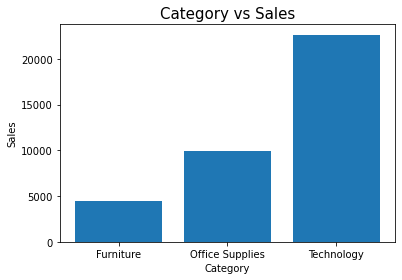

In [7]:
plt.bar('Category','Sales',data = dataset)
plt.title('Category vs Sales',size = 15)
plt.xlabel('Category',size = 10)
plt.ylabel('Sales', size = 10)

Quantities Ordered by each Segment

In [8]:
dataset_group = dataset.groupby('Segment')['Quantity'].sum().reset_index()

In [9]:
dataset_group

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


Text(0.5, 1.0, 'Quantities ordered by each segment')

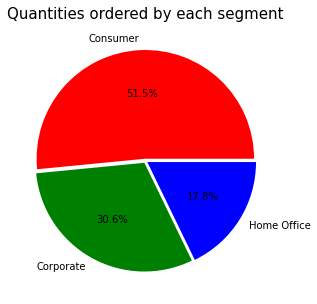

In [10]:
labels = dataset_group['Segment'].unique()
colors = ['Red','Green','Blue']
plt.figure(figsize = (5,5))
plt.pie(dataset_group['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02), colors=colors)
plt.title('Quantities ordered by each segment',size= 15)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

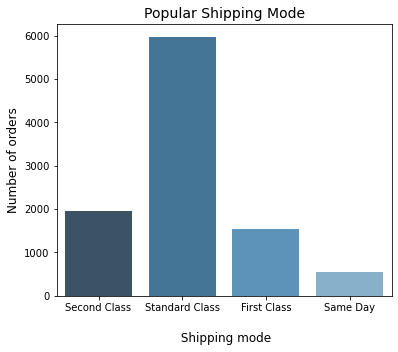

In [11]:
plt.figure(figsize=(6,5))
sns.countplot('Ship Mode',data=dataset, palette='Blues_d')
plt.title('Popular Shipping Mode',size=14)
plt.xlabel('\n Shipping mode',size=12)
plt.ylabel('Number of orders',size=12)
plt.xticks(fontsize=10)

the standard class shipping has the most count which means the customers have opted for this type of shipping mode the most.

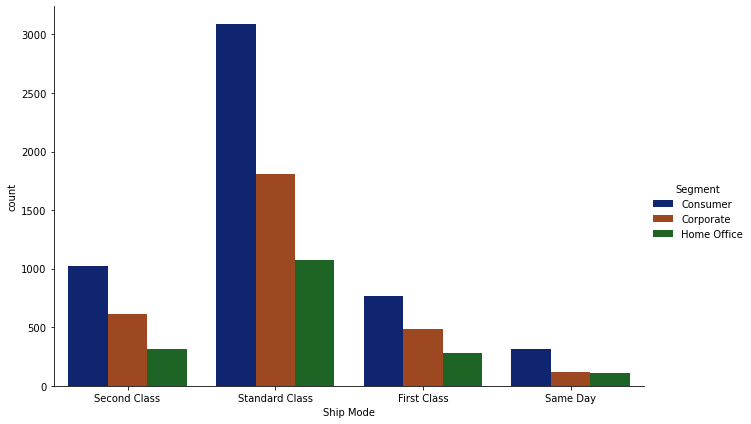

In [12]:
sns.catplot('Ship Mode',data=dataset,hue='Segment',kind='count',palette='dark',aspect=1.5,height=6)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

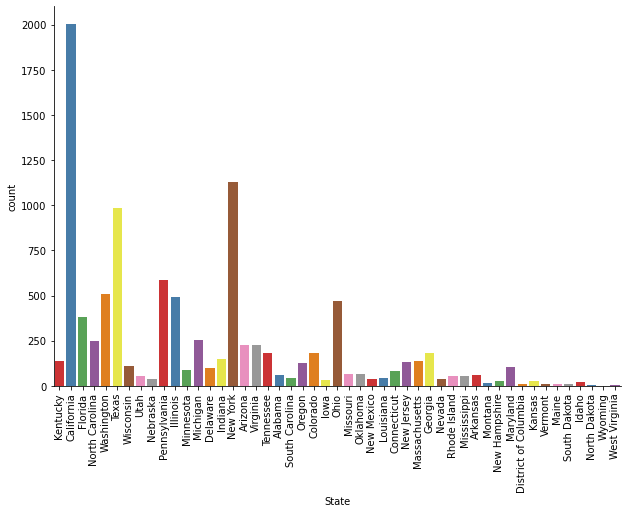

In [13]:
sns.catplot('State',kind='count',data=dataset,palette='Set1',height=6,aspect=1.5)
plt.xticks(rotation=90)

Quantities Ordered Region Wise

    Region  Quantity
0  Central      8780
1     East     10618
2    South      6209
3     West     12266


Text(0.5, 1.0, 'Quantities ordered by each region')

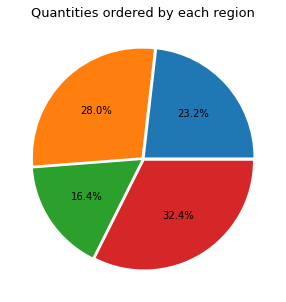

In [14]:
df_region=dataset.groupby('Region')['Quantity'].sum().reset_index()
print(df_region)

labels = df_region['Region'].unique()
plt.figure(figsize=(5,5))
plt.pie(df_region['Quantity'],autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02),)
plt.title('Quantities ordered by each region',size=13)

Highest Selling Categories

In [15]:
df_cats = dataset.groupby('Category')['Quantity'].sum().reset_index()
df_cats

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


Text(0.5, 1.0, 'Distribution of products sold')

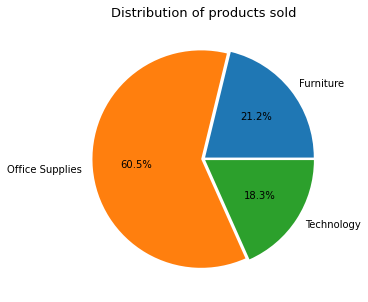

In [16]:
plt.figure(figsize=(5,5))
labels=df_cats['Category'].unique()
plt.pie(df_cats['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('Distribution of products sold',size=13)

Distribution of profits categorywise

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


Text(0.5, 1.0, 'Distribution of profits categorywise')

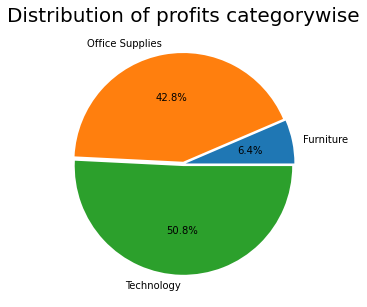

In [17]:
dfprofit = dataset.groupby('Category')['Profit'].sum().reset_index()
print(dfprofit)
plt.figure(figsize=(5,5))
labels=dfprofit['Category'].unique()
plt.pie(dfprofit['Profit'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('Distribution of profits categorywise',size=20)